# Predict deaths

In [7]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
warnings.filterwarnings('ignore')

In [8]:
#import data
df=pd.read_csv('https://github.com/hongdoudahongdou/MDA/blob/main/data/df_death.csv?raw=true')
df.head()

,Year,Country,ISO,Total Deaths,GDP(million dollars),Population,Health expenditure (% of GDP),Associated Drought,Associated Wildfire,Appeal or Declaration,duration,ISO_2,max_temperature
0,2000,Bulgaria,BGR,7.0,1.324599e+10,8.170172e+06,5.829710,0,0,0,31,BG,37.6
1,2000,Cyprus,CYP,5.0,9.985844e+09,9.482370e+05,5.308001,0,0,0,1,CY,32.9
2,2000,Greece,GRC,27.0,1.304580e+11,1.080581e+07,7.243326,0,0,0,1,GR,30.2
3,2000,Turkey,TUR,11.0,2.742950e+11,6.411355e+07,4.599572,1,0,0,31,TR,38.0
4,2002,China,CHN,7.0,1.470560e+12,1.280400e+09,4.382853,0,0,0,1,CN,33.2


## Data Exporation 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           102 non-null    int64  
 1   Country                        102 non-null    object 
 2   ISO                            102 non-null    object 
 3   Total Deaths                   102 non-null    float64
 4   GDP(million dollars)           102 non-null    float64
 5   Population                     102 non-null    float64
 6   Health expenditure (% of GDP)  102 non-null    float64
 7   Associated Drought             102 non-null    int64  
 8   Associated Wildfire            102 non-null    int64  
 9   Appeal or Declaration          102 non-null    int64  
 10  duration                       102 non-null    int64  
 11  ISO_2                          102 non-null    object 
 12  max_temperature                102 non-null    flo

In [10]:
df.describe()

,Year,Total Deaths,GDP(million dollars),Population,Health expenditure (% of GDP),Associated Drought,Associated Wildfire,Appeal or Declaration,duration,max_temperature
count,102.000000,102.000000,1.020000e+02,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,2009.656863,1517.009804,1.664800e+12,2.234481e+08,7.698621,0.127451,0.068627,0.009804,20.558824,30.446078
std,6.501325,6309.336604,1.857696e+12,4.163568e+08,2.871502,0.335124,0.254068,0.099015,42.417905,7.145443
min,2000.000000,1.000000,5.682784e+09,4.516300e+05,2.336477,0.000000,0.000000,0.000000,1.000000,5.400000
25%,2004.000000,16.000000,2.488392e+11,1.150139e+07,5.238918,0.000000,0.000000,0.000000,1.000000,27.000000
50%,2007.000000,108.000000,9.194120e+11,6.099303e+07,8.267092,0.000000,0.000000,0.000000,7.500000,31.450000
75%,2015.000000,451.000000,2.486028e+12,1.279590e+08,10.334237,0.000000,0.000000,0.000000,31.000000,35.200000
max,2021.000000,55736.000000,9.570470e+12,1.383112e+09,12.205050,1.000000,1.000000,1.000000,377.000000,42.800000


<AxesSubplot:>

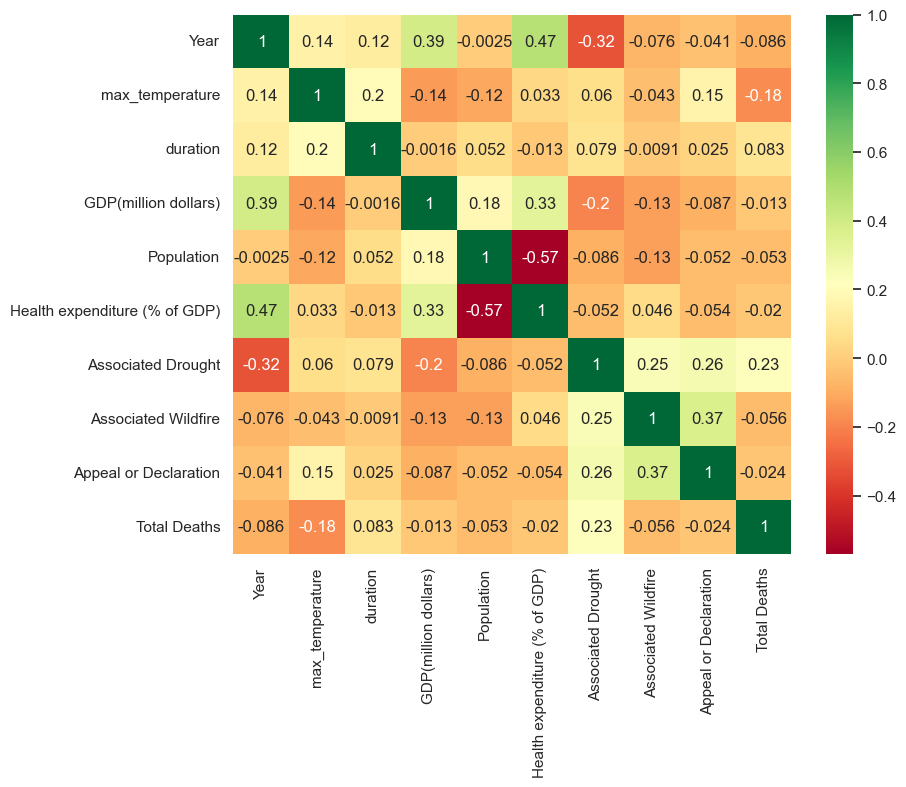

In [11]:
sns.set(rc = {'figure.figsize':(9,7)})
sns.heatmap(df[['Year','max_temperature','duration','GDP(million dollars)','Population','Health expenditure (% of GDP)','Associated Drought',
                   'Associated Wildfire','Appeal or Declaration','Total Deaths']].corr(),cmap='RdYlGn',annot=True)

The correlation among the variables is generally at a lower level.

In [13]:
x = df[['Year','GDP(million dollars)','Population','Health expenditure (% of GDP)','max_temperature','Associated Drought','Associated Wildfire',
        'Appeal or Declaration','duration']]
y = df[['Total Deaths']]
x.head()

,Year,GDP(million dollars),Population,Health expenditure (% of GDP),max_temperature,Associated Drought,Associated Wildfire,Appeal or Declaration,duration
0,2000,1.324599e+10,8.170172e+06,5.829710,37.6,0,0,0,31
1,2000,9.985844e+09,9.482370e+05,5.308001,32.9,0,0,0,1
2,2000,1.304580e+11,1.080581e+07,7.243326,30.2,0,0,0,1
3,2000,2.742950e+11,6.411355e+07,4.599572,38.0,1,0,0,31
4,2002,1.470560e+12,1.280400e+09,4.382853,33.2,0,0,0,1


## Change the scale of several variables

In [14]:
x['Yearnew']=x['Year'].apply(np.log)
x['log_GDP(million dollars)']=x['GDP(million dollars)'].apply(np.log)
x['log_Population(e+07)']=x['Population'].apply(np.log)
x.drop(['Year','GDP(million dollars)','Population'],axis=1,inplace=True)
x.head()

,Health expenditure (% of GDP),max_temperature,Associated Drought,Associated Wildfire,Appeal or Declaration,duration,Yearnew,log_GDP(million dollars),log_Population(e+07)
0,5.829710,37.6,0,0,0,31,7.600902,23.306961,15.916001
1,5.308001,32.9,0,0,0,1,7.600902,23.024434,13.762360
2,7.243326,30.2,0,0,0,1,7.600902,25.594317,16.195594
3,4.599572,38.0,1,0,0,31,7.600902,26.337470,17.976166
4,4.382853,33.2,0,0,0,1,7.601902,28.016664,20.970438


## Split test and train dataset

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234,test_size=0.2, shuffle=True)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(81, 9)
(81, 1)
(21, 9)
(21, 1)


## Poisson regression 
Poisson regression is used to predict a dependent variable that consists of "count data" given one or more independent variables. Here we can regard the total deaths as the count of deaths.

In [33]:
pmodel = sm.GLM(y_train,x_train,family=sm.families.Poisson())
results = pmodel.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Total Deaths   No. Observations:                   81
Model:                            GLM   Df Residuals:                       72
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3708e+05
Date:                Wed, 09 Aug 2023   Deviance:                   2.7362e+05
Time:                        15:37:05   Pearson chi2:                 4.74e+05
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Health expendi

All the coefficients are significant

## Diagnosis 

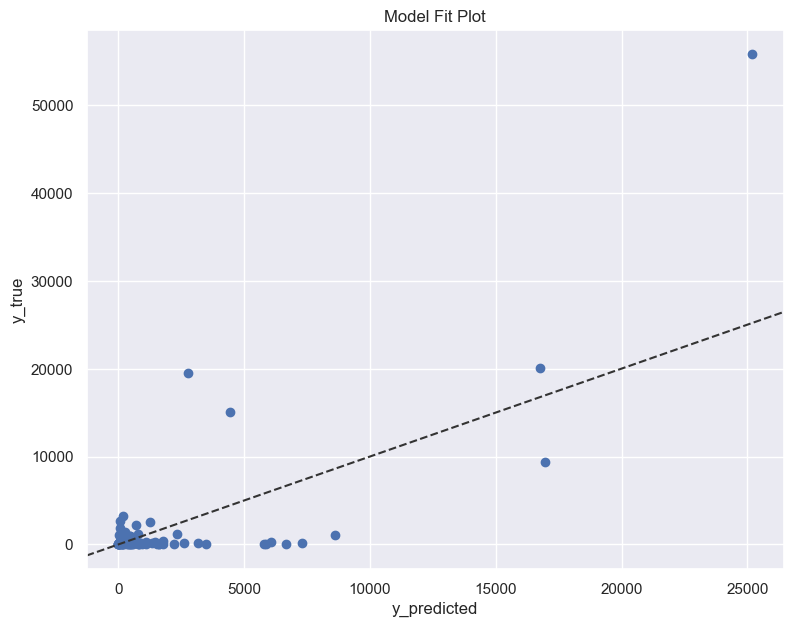

In [34]:
predict_1 = results.predict()
plt.scatter(predict_1, y_train)
plt.axline([0,0],slope=1,c=".2", ls="--")
plt.title('Model Fit Plot')
plt.xlabel('y_predicted')
plt.ylabel('y_true')
plt.show()

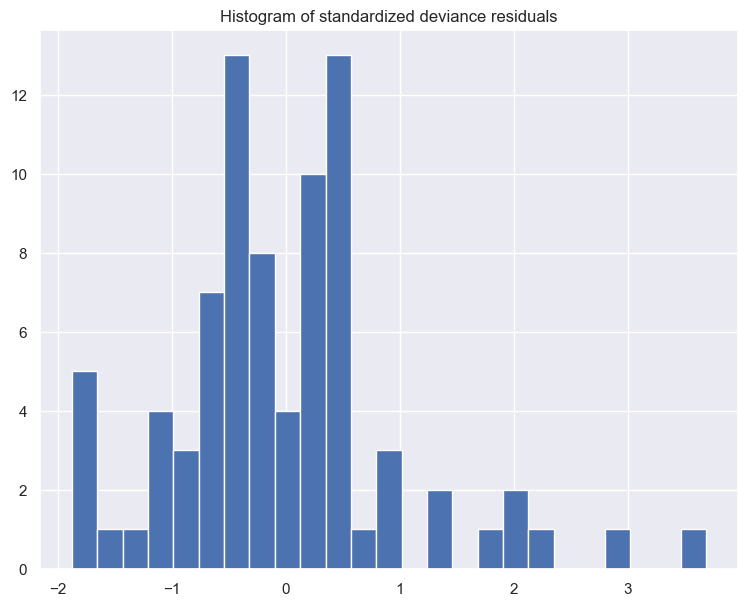

In [35]:
fig, ax = plt.subplots()
resid = results.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

Clearly, we can see some extreme outliers

In [36]:
a=pd.DataFrame(abs(resid_std),columns=['ABS SDR'])
outliers=a.loc[a['ABS SDR']>=2.5]
outliers

,ABS SDR
13,3.688236
60,2.985779


In [37]:
x_train_new=x_train.drop(index=[13,60])
y_train_new=y_train.drop(index=[13,60])
print(x_train_new.shape)
print(y_train_new.shape)

(79, 9)
(79, 1)


In [38]:
#refit the model
pmodel2 = sm.GLM(y_train_new,x_train_new,family=sm.families.Poisson())
results2 = pmodel2.fit()
print(results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Total Deaths   No. Observations:                   79
Model:                            GLM   Df Residuals:                       70
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47045.
Date:                Wed, 09 Aug 2023   Deviance:                       93579.
Time:                        15:37:37   Pearson chi2:                 1.59e+05
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Health expendi

We can see that the coefficient has changed a lot. The Log-Likelihood is much larger, and the Pseudo R-squ. (CS) is quite close to 1.

##  Overdispersion
In a poisson model we assume that the mean is equal to variance, and this is often not the case in practice.

In [39]:
print('mean:',np.mean(y_train_new))
print('variance:',np.var(y_train_new))

mean: Total Deaths    964.632911
dtype: float64
variance: Total Deaths    8.781874e+06
dtype: float64


Here variance is much larger than the mean. We choose a negative binomial model to fix it.

##  Negative binomial model

In [40]:
pmodel3 = sm.GLM(y_train_new,x_train_new,family=sm.families.NegativeBinomial())
results3 = pmodel3.fit()
print(results3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Total Deaths   No. Observations:                   79
Model:                            GLM   Df Residuals:                       70
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -552.21
Date:                Wed, 09 Aug 2023   Deviance:                       210.92
Time:                        15:37:55   Pearson chi2:                     180.
No. Iterations:                    12   Pseudo R-squ. (CS):             0.8288
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Health expendi

Negative binomia model has a much better performance than the poisson model: the Log-Likelihood is even closer to zero, and the residual plot also has a better shape.

## Validate with the test group

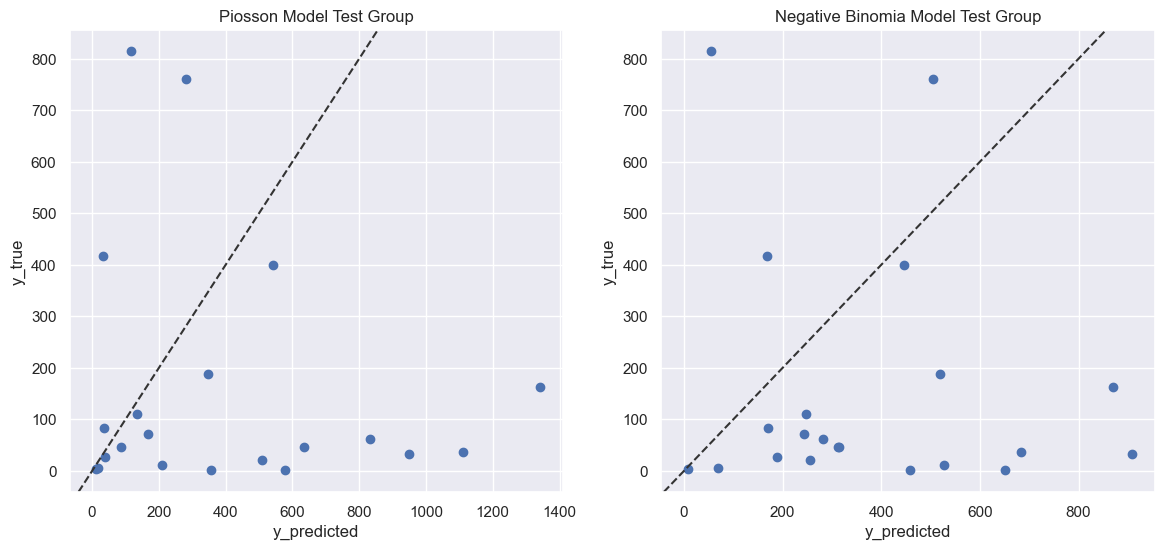

In [41]:
fig = plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
predict_2 = results2.predict(x_test)
plt.scatter(predict_2,y_test)
plt.axline([0,0],slope=1,c=".2", ls="--")
plt.title('Piosson Model Test Group')
plt.xlabel('y_predicted')
plt.ylabel('y_true')
plt.subplot(1,2,2)
predict_3 = results3.predict(x_test)
plt.scatter(predict_3,y_test)
plt.axline([0,0],slope=1,c=".2", ls="--")
plt.title('Negative Binomia Model Test Group')
plt.xlabel('y_predicted')
plt.ylabel('y_true')
plt.show()

In [42]:
resp=y_test.values.ravel()-predict_2
resn=y_test.values.ravel()-predict_3
c=resp*resn
d=resn*resn
MSEP=np.mean(c)
MSEN=np.mean(d)
print('MSEPoisson:',round(MSEP))
print('Negative binomial:',round(MSEN))

MSEPoisson: 202480
Negative binomial: 177837


The negative binomial model also has a smaller MSE, so we choose this model to predict heatwaves in the future. Note that this model still work bad with some extreme situations, one reason may be that the records are incorrect. But if the dataset does not make any mistakes, that suggests that we still need some more useful variables to predict the total deaths. More research should be made and more data should be collected. To fight with the heatwave, we still have a long way to go.